In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl

from numpy import zeros,zeros_like,array
from mpl_toolkits.axes_grid1 import ImageGrid

In [6]:
def myShrinkImageByFactorD(d,cmap="inferno"):
    """
    d : List of 
    Shrink the image size by a factor of d along each dimension using image subsampling by
    sampling / selecting every d -th pixel along the rows and columns.
    This is the function that takes in the mutliples D to resize the image
    along with a colormap
    """
    input_file = "../data/circles_concentric.png"
    input_image = mpimg.imread(input_file,format="png")
    num_plots = len(d)+1
    
    width = input_image.shape[0]
    height = input_image.shape[1]
    
    fig,axes = plt.subplots(1,num_plots, constrained_layout=True, gridspec_kw={'width_ratios':[4,2,1]})
    
    #vmin = 0
    #vmax = 255

    axes[0].imshow(input_image,cmap)
    axes[0].axis("on")
    
    count = 0

    for i in d:
        count = count + 1
        new_width = int(width/i)
        new_height = int(height/i)
        output = zeros((new_width,new_height))
        for W in range(new_width):
            for H in range(new_height):
                #if W%i==0 and H%i==0:
                    #new_width = int(W*i)
                    #new_height = int(H*i)
                output[W][H] = input_image[W*i][H*i]

        im = axes[count].imshow(output,cmap)
        axes[count].axis("on")

    #plt.subplots_adjust(right=0.8)
    #cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
    cbar = fig.colorbar(im,ax=axes.ravel().tolist(),ticks=[0,1],shrink=0.45)
    cbar.ax.set_yticklabels([0,255])
    plt.show()

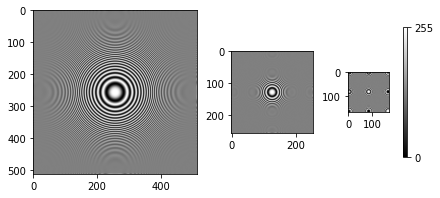

In [7]:
myShrinkImageByFactorD([2,3],cmap="gray")

In [17]:
from math import ceil,floor

def myBilinearInterpolation(input_image,cmap="gray"):
#     input_file = "../data/barbaraSmall.png"
#     input_image = mpimg.imread(input_file,format="png")
    rows = input_image.shape[0]
    columns = input_image.shape[1]
    new_cols = 2*columns-1
    new_rows = 3*rows-2
    row_ratio = ceil(new_rows/rows)
    col_ratio = ceil(new_cols/columns)
    output = zeros((new_rows,new_cols))
    for row in range(new_rows):
        r = row/row_ratio
        r1 = floor(r)
        r2 = ceil(r)
        for col in range(new_cols):
            c = col/col_ratio
            c1 = floor(c)
            c2 = ceil(c)
            
            if(r1<=rows and r2<=rows and c1<=columns and c2<=columns):
                bottom_left = input_image[r1][c1]
                bottom_right = input_image[r1][c2]
                top_left = input_image[r2][c1]
                top_right = input_image[r2][c2]
                output[row][col] = bottom_right*(r%1)*(1-(c%1)) + bottom_left*(1-r%1)*(1-c%1)+top_right*(r%1)*(c%1) + top_left*(1-r%1)*(c%1)
    
    fig,axes = plt.subplots(1,2, constrained_layout=True, gridspec_kw={'width_ratios':[1,2]})
    axes[0].imshow(input_image,cmap)
    axes[0].axis("on")
    
    im = axes[1].imshow(output,cmap)
    axes[1].axis("on")
    
    cbar = fig.colorbar(im,ax=axes.ravel().tolist(),ticks=[0,1])
    cbar.ax.set_yticklabels([0,255])
    plt.show()
            
            

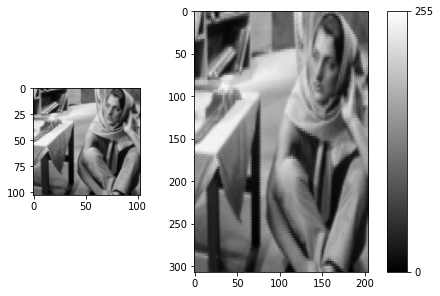

In [19]:
input_file = "../data/barbaraSmall.png"
input_image = mpimg.imread(input_file,format="png")
myBilinearInterpolation(input_image)

In [20]:
def myNearestNeighbourInterpolation(input_image,cmap="gray"):
#     input_file = "../data/barbaraSmall.png"
#     input_image = mpimg.imread(input_file,format="png")
    rows = input_image.shape[0]
    columns = input_image.shape[1]
    new_cols = 2*columns-1
    new_rows = 3*rows-2
    row_ratio = ceil(new_rows/rows)
    col_ratio = ceil(new_cols/columns)
    output = zeros((new_rows,new_cols))
    for row in range(new_rows):
        r = row/row_ratio
        r1 = (floor(r) if (r%1)<0.5 else ceil(r))
        for col in range(new_cols):
            c = col/col_ratio
            c1 = (floor(c) if (c%1)<0.5 else ceil(c))
            output[row][col] = input_image[r1][c1]
            
    fig,axes = plt.subplots(1,2, constrained_layout=True, gridspec_kw={'width_ratios':[1,2]})
    axes[0].imshow(input_image,cmap)
    axes[0].axis("on")
    
    im = axes[1].imshow(output,cmap)
    axes[1].axis("on")
    
    cbar = fig.colorbar(im,ax=axes.ravel().tolist(),ticks=[0,1])
    cbar.ax.set_yticklabels([0,255])
    plt.show()

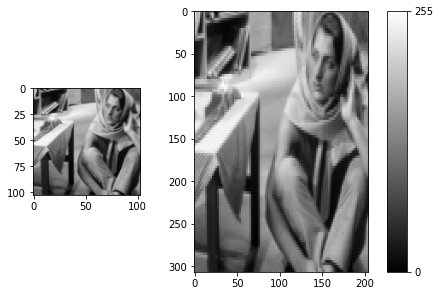

In [22]:
input_file = "../data/barbaraSmall.png"
input_image = mpimg.imread(input_file,format="png")
myNearestNeighbourInterpolation(input_image)

In [ ]:
def myBicubicInterpolation(cmap="gray"):
    

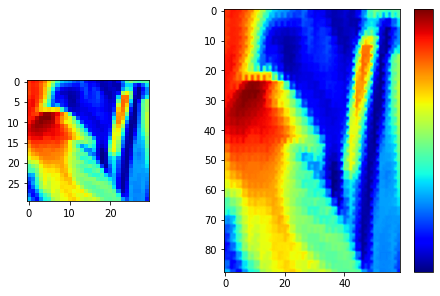

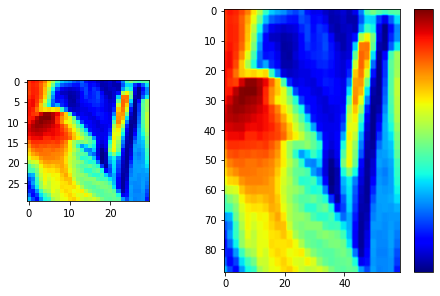

In [25]:
region = input_image[50:80,50:80]
myBilinearInterpolation(region,cmap="jet")
myNearestNeighbourInterpolation(region,cmap="jet")

In [30]:
from math import cos,sin

def myImageRotation(input_image,theta,cmap="gray"):
    translation_matrix = array([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]])
    rows = input_image.shape[0]
    columns = input_image.shape[1]
    new_image = np.zeros_like(input_image)
    for row in range(rows):
        for col in range(columns):
            [row_prime,col_prime] = np.matmul(translation_matrix,array([row,col]).T)
            #print(row_prime,col_prime)
            
    
#     new_cols = 2*columns-1
#     new_rows = 3*rows-2
#     row_ratio = ceil(new_rows/rows)
#     col_ratio = ceil(new_cols/columns)
#     output = zeros((new_rows,new_cols))
#     for row in range(new_rows):
    

In [31]:
myImageRotation(input_image,30)

0.0 0.0
0.9880316240928618 0.15425144988758405
1.9760632481857237 0.3085028997751681
2.9640948722785856 0.46275434966275214
3.9521264963714473 0.6170057995503362
4.940158120464309 0.7712572494379202
5.928189744557171 0.9255086993255043
6.9162213686500325 1.0797601492130884
7.904252992742895 1.2340115991006724
8.892284616835756 1.3882630489882564
9.880316240928618 1.5425144988758404
10.86834786502148 1.6967659487634246
11.856379489114342 1.8510173986510086
12.844411113207205 2.0052688485385928
13.832442737300065 2.1595202984261768
14.820474361392927 2.3137717483137608
15.80850598548579 2.4680231982013447
16.79653760957865 2.6222746480889287
17.78456923367151 2.7765260979765127
18.772600857764374 2.9307775478640967
19.760632481857236 3.0850289977516807
20.7486641059501 3.239280447639265
21.73669573004296 3.393531897526849
22.724727354135823 3.547783347414433
23.712758978228685 3.702034797302017
24.700790602321547 3.856286247189601
25.68882222641441 4.0105376970771855
26.676853850507268 4

78.45472972823147 3.1393284743958
79.44276135232434 3.2935799242833834
80.4307929764172 3.447831374170967
81.41882460051006 3.6020828240585523
82.40685622460292 3.756334273946136
83.39488784869579 3.9105857238337194
84.38291947278864 4.064837173721305
85.37095109688151 4.219088623608888
86.35898272097437 4.373340073496472
87.34701434506722 4.527591523384055
88.33504596916009 4.681842973271641
89.32307759325295 4.836094423159224
90.31110921734582 4.990345873046808
91.29914084143867 5.144597322934393
92.28717246553154 5.298848772821977
93.2752040896244 5.45310022270956
94.26323571371726 5.607351672597144
95.25126733781012 5.761603122484729
96.23929896190299 5.915854572372313
97.22733058599584 6.070106022259896
98.21536221008871 6.2243574721474815
99.20339383418157 6.378608922035065
100.19142545827444 6.532860371922649
101.17945708236729 6.687111821810232
102.16748870646016 6.841363271697817
1.5425144988758404 -9.880316240928618
2.530546122968702 -9.726064791041034
3.5185777470615642 -9.5

41.309759437598125 -11.768762688055734
42.29779106169099 -11.61451123816815
43.28582268578385 -11.460259788280567
44.27385430987671 -11.306008338392981
45.26188593396957 -11.151756888505398
46.249917558062435 -10.997505438617814
47.2379491821553 -10.843253988730229
48.22598080624816 -10.689002538842646
49.21401243034102 -10.534751088955062
50.202044054433884 -10.380499639067477
51.190075678526746 -10.226248189179893
52.17810730261961 -10.07199673929231
53.16613892671247 -9.917745289404724
54.15417055080533 -9.76349383951714
55.142202174898195 -9.609242389629557
56.13023379899105 -9.454990939741974
57.11826542308391 -9.30073948985439
58.106297047176774 -9.146488039966805
59.094328671269636 -8.992236590079221
60.0823602953625 -8.837985140191638
61.07039191945536 -8.683733690304052
62.05842354354822 -8.529482240416469
63.046455167641085 -8.375230790528885
64.03448679173394 -8.220979340641302
65.02251841582681 -8.066727890753716
66.01055003991966 -7.912476440866133
66.99858166401253 -7.758

80.08897275222755 -13.811460585070437
81.0770043763204 -13.657209135182853
82.06503600041327 -13.50295768529527
83.05306762450613 -13.348706235407686
84.041099248599 -13.1944547855201
85.02913087269185 -13.040203335632517
86.01716249678472 -12.885951885744934
87.00519412087758 -12.731700435857348
87.99322574497045 -12.577448985969765
88.9812573690633 -12.423197536082181
89.96928899315616 -12.268946086194598
90.95732061724902 -12.114694636307012
91.94535224134188 -11.960443186419429
92.93338386543475 -11.806191736531845
93.9214154895276 -11.65194028664426
94.90944711362047 -11.497688836756677
95.89747873771333 -11.343437386869093
96.8855103618062 -11.18918593698151
97.87354198589905 -11.034934487093924
98.86157360999192 -10.88068303720634
99.84960523408478 -10.726431587318757
100.83763685817765 -10.572180137431172
101.8256684822705 -10.417928687543588
102.81370010636337 -10.263677237656005
103.80173173045623 -10.109425787768421
104.7897633545491 -9.955174337880836
4.164789146964769 -26.

94.78440126408576 -23.662571225646182
95.77243288817861 -23.5083197757586
96.76046451227148 -23.354068325871015
97.74849613636434 -23.19981687598343
98.73652776045721 -23.04556542609585
99.72455938455006 -22.891313976208263
100.71259100864293 -22.737062526320678
101.70062263273579 -22.582811076433096
102.68865425682866 -22.42855962654551
103.67668588092151 -22.274308176657925
104.66471750501438 -22.120056726770343
105.65274912910724 -21.96580527688276
106.6407807532001 -21.811553826995173
6.015806545615778 -38.53323333962161
7.00383816970864 -38.37898188973403
7.991869793801501 -38.22473043984644
8.979901417894364 -38.07047898995886
9.967933041987225 -37.916227540071276
10.955964666080087 -37.76197609018369
11.943996290172949 -37.607724640296105
12.93202791426581 -37.45347319040852
13.920059538358672 -37.299221740520935
14.908091162451534 -37.14497029063335
15.896122786544396 -36.99071884074577
16.884154410637258 -36.83646739085818
17.87218603473012 -36.6822159409706
18.860217658822982

66.68596704017574 -38.17043096320233
67.67399866426861 -38.01617951331474
68.66203028836146 -37.86192806342716
69.65006191245433 -37.707676613539576
70.63809353654719 -37.553425163651994
71.62612516064006 -37.399173713764405
72.61415678473291 -37.24492226387682
73.60218840882578 -37.090670813989234
74.59022003291864 -36.93641936410165
75.5782516570115 -36.78216791421407
76.56628328110436 -36.62791646432649
77.55431490519723 -36.4736650144389
78.54234652929009 -36.31941356455132
79.53037815338296 -36.16516211466373
80.51840977747581 -36.01091066477615
81.50644140156868 -35.856659214888566
82.49447302566153 -35.702407765000984
83.4825046497544 -35.548156315113395
84.47053627384726 -35.393904865225814
85.45856789794013 -35.23965341533823
86.44659952203298 -35.08540196545064
87.43463114612585 -34.93115051556306
88.42266277021871 -34.77689906567548
89.41069439431158 -34.6226476157879
90.39872601840443 -34.46839616590031
91.3867576424973 -34.31414471601273
92.37478926659016 -34.1598932661251

38.58753281626573 -52.67829070075846
39.57556444035859 -52.52403925087088
40.56359606445145 -52.369787800983296
41.551627688544315 -52.21553635109571
42.53965931263717 -52.061284901208126
43.52769093673004 -51.907033451320544
44.515722560822894 -51.75278200143296
45.50375418491576 -51.59853055154537
46.49178580900862 -51.44427910165779
47.47981743310149 -51.2900276517702
48.46784905719434 -51.13577620188262
49.45588068128721 -50.98152475199504
50.44391230538007 -50.82727330210746
51.431943929472936 -50.67302185221987
52.41997555356579 -50.51877040233229
53.40800717765866 -50.364518952444705
54.396038801751516 -50.210267502557116
55.384070425844385 -50.056016052669534
56.37210204993724 -49.90176460278195
57.36013367403011 -49.74751315289436
58.348165298122964 -49.59326170300678
59.336196922215834 -49.4390102531192
60.32422854630869 -49.28475880323161
61.31226017040156 -49.13050735334403
62.30029179449441 -48.97625590345645
63.28832341858727 -48.822004453568866
64.27635504268014 -48.6677

96.44784988843469 -53.766274298094785
97.43588151252756 -53.612022848207204
98.42391313662041 -53.45777139831962
99.41194476071328 -53.30351994843203
100.39997638480614 -53.14926849854445
101.388008008899 -52.99501704865686
102.37603963299186 -52.84076559876928
103.36407125708473 -52.6865141488817
104.35210288117759 -52.53226269899412
105.34013450527046 -52.37801124910653
106.32816612936331 -52.223759799218946
107.31619775345618 -52.06950834933136
108.30422937754904 -51.915256899443776
109.2922610016419 -51.761005449556194
110.28029262573476 -51.60675399966861
111.26832424982763 -51.45250254978102
10.643350042243299 -68.17418206240747
11.63138166633616 -68.01993061251989
12.619413290429023 -67.8656791626323
13.607444914521885 -67.71142771274472
14.595476538614745 -67.55717626285713
15.583508162707608 -67.40292481296954
16.57153978680047 -67.24867336308196
17.55957141089333 -67.09442191319438
18.547603034986192 -66.9401704633068
19.535634659079054 -66.78591901341922
20.523666283171917 -

56.64728762529792 -71.11318305839481
57.63531924939078 -70.95893160850723
58.623350873483645 -70.80468015861965
59.61138249757651 -70.65042870873205
60.59941412166937 -70.49617725884447
61.58744574576223 -70.34192580895689
62.57547736985509 -70.1876743590693
63.563508993947956 -70.03342290918172
64.55154061804082 -69.87917145929413
65.53957224213367 -69.72492000940655
66.52760386622654 -69.57066855951896
67.5156354903194 -69.41641710963138
68.50366711441227 -69.2621656597438
69.49169873850512 -69.10791420985622
70.47973036259799 -68.95366275996864
71.46776198669085 -68.79941131008104
72.45579361078372 -68.64515986019346
73.44382523487657 -68.49090841030588
74.43185685896944 -68.3366569604183
75.4198884830623 -68.18240551053071
76.40792010715516 -68.02815406064313
77.39595173124802 -67.87390261075554
78.38398335534089 -67.71965116086795
79.37201497943374 -67.56539971098037
80.36004660352661 -67.41114826109279
81.34807822761947 -67.25689681120521
82.33610985171234 -67.10264536131763
83.3

98.6990987119811 -74.66918985393247
99.68713033607395 -74.51493840404488
100.67516196016682 -74.3606869541573
101.66319358425967 -74.20643550426972
102.65122520835254 -74.05218405438214
103.6392568324454 -73.89793260449454
104.62728845653827 -73.74368115460696
105.61532008063112 -73.58942970471938
106.60335170472399 -73.4351782548318
107.59138332881685 -73.28092680494422
108.57941495290972 -73.12667535505663
109.56744657700257 -72.97242390516905
110.55547820109544 -72.81817245528146
111.5435098251883 -72.66392100539387
112.53154144928116 -72.50966955550629
113.51957307337402 -72.35541810561871
114.50760469746689 -72.20116665573113
13.882630489882564 -88.92284616835757
14.870662113975426 -88.76859471846998
15.858693738068288 -88.6143432685824
16.84672536216115 -88.46009181869482
17.83475698625401 -88.30584036880722
18.822788610346873 -88.15158891891964
19.810820234439735 -87.99733746903206
20.798851858532597 -87.84308601914448
21.78688348262546 -87.6888345692569
22.774915106718318 -87.5

114.38255884793217 -84.36604904462064
115.37059047202503 -84.21179759473306
116.3586220961179 -84.05754614484547
15.733647888533573 -100.77922565747191
16.721679512626434 -100.62497420758433
17.709711136719296 -100.47072275769675
18.697742760812158 -100.31647130780917
19.68577438490502 -100.16221985792157
20.673806008997882 -100.00796840803399
21.661837633090745 -99.8537169581464
22.649869257183607 -99.69946550825883
23.63790088127647 -99.54521405837124
24.625932505369327 -99.39096260848366
25.61396412946219 -99.23671115859607
26.60199575355505 -99.08245970870848
27.590027377647914 -98.9282082588209
28.578059001740776 -98.77395680893332
29.56609062583364 -98.61970535904574
30.5541222499265 -98.46545390915816
31.542153874019363 -98.31120245927056
32.530185498112225 -98.15695100938298
33.51821712220509 -98.0026995594954
34.50624874629795 -97.84844810960782
35.49428037039081 -97.69419665972023
36.48231199448367 -97.53994520983265
37.470343618576536 -97.38569375994506
38.4583752426694 -97.